Second try of the Pol code since the first one did not give any sensible fits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df0=pd.read_excel('POL Daten.xlsx',sheet_name='t, phi')
labels=list(df0.columns)  #Nehme mir die labels von den spalten
labels=labels[1:] #Erste weg, ist ja t
lambda_list=[]
omega_list=[]
omega_fehler=[]
lambda_fehler=[]

df0.head()

,Time [s],Phi [deg] 0.2A,Phi [deg] 0.29A,Phi [deg] 0.4A,Phi [deg] 0.5A,Phi [deg] 0.59A,Phi [deg] 0.7A,Phi [deg] 0.8A,Phi [deg] 0.9A,Phi [deg] 1A,Phi [deg] 1.1A,Phi [deg] 1.2A,Phi [deg] 1.3A,Phi [deg] 1.4A,Phi [deg] 1.49A
0,0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.02,-0.01
1,0.08,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2,0.13,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01
3,0.18,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
4,0.23,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01


<AxesSubplot:xlabel='Time [s]'>

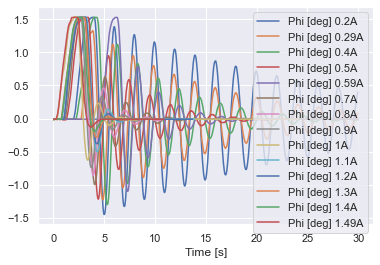

In [3]:
df0.plot(x="Time [s]")

Will try the code for one dataset. New ideas:
Start at maximum since I'm using a cosine function which starts at 1, so we can ignore the phaseshift

In [4]:
I=[0.2,0.29,0.4,0.49,0.59,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]

In [5]:
for i in range(len(labels)):
    df=df0.copy(deep=True) #necessary to create copy, otherwise orginal dataframe will be modyfied. Problem for t data
    title=labels[i]
    t=df['Time [s]'] #define x data
    phi=df[title].dropna() #define y data, dropna makes sure i have no nans in my data, which are there since the datasets 
    #are not all the same length
    max_pos=df.idxmax() #finding index of maximum for each dataset
    max_pos=max_pos[1:] #getting rid of max for the time column
    phi0=df[title][max_pos[i]] #setting phi0 as maximum of function
    phi=phi[max_pos[i]:] #making y data start at maximum
    phi=phi.reset_index(drop=True) #resets index of phi, useful for while loop otherwise difficult to call elements
    count=0
    while (phi[0]-phi[1])<(phi[0]/100):
        del phi[0]
        phi=phi.reset_index(drop=True) #have to reset it every time
        count+=1
    t_max=t[max_pos[i]] #need to shift the t to zero to get a good fit so we need t value of starting point
    t=t[max_pos[i]+count:] #making x data start at max of y
    t-=t_max
    t=t.reset_index(drop=True)
    if len(t)!= len(phi): #just making sure that x and y have the same length
        t=t[:len(phi)]
    def func(t, lam, omega, beta, phi): #defining ,my function here after finding Phi0, otherwise have to use lambda funct to 
        #pass parameter i think
        return phi*np.exp(-lam*t)*np.cos(omega*t+beta)
    popt, pcov = curve_fit(func, t, phi,maxfev=5000) #this is just fitting, we are interested in the first to things that popt returns
    lambdat,omegat,betat, phi=popt[0],popt[1],popt[2],popt[3] #assigning a bit of stuff to make the code more readable
    lambda_list.append(lambdat)
    omega_list.append(omegat)
    fehler=np.sqrt(np.diag(pcov))
    #lambdafehler, omegafehler = fehler[0], fehler[1] davon muss man noch die wurzel ziehen
    omega_fehler.append(fehler[1])
    lambda_fehler.append(fehler[0])

In [6]:
phi=df[title]
#print(phi)

In [7]:
lambda_list_numpy=np.asarray(lambda_list)
lambda_fehler_numpy=np.asarray(lambda_fehler)

In [8]:
pd.DataFrame(lambda_list).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &         0 \\\\\n\\midrule\n0  &  0.048250 \\\\\n1  &  0.088455 \\\\\n2  &  0.154668 \\\\\n3  &  0.243367 \\\\\n4  &  0.328388 \\\\\n5  &  0.443846 \\\\\n6  &  0.577060 \\\\\n7  &  0.727333 \\\\\n8  &  0.875124 \\\\\n9  &  1.069006 \\\\\n10 &  1.263228 \\\\\n11 &  1.458765 \\\\\n12 &  1.686806 \\\\\n13 &  1.869654 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Following 2 plots are with wrong data
The following plots look bad because the last 5 data points somehow get fitted in a very weird way. further down it is done again witha a few manual adjustments to aparameters and we get much  better results

In [9]:
def format(xlabel, ylabel):
    plt.xlabel(xlabel, fontsize=15, labelpad=None)
    plt.ylabel(ylabel, fontsize=15, labelpad=None)
    plt.grid(b=True, which='major', axis='both')
    plt.xticks(fontsize=15 )
    plt.yticks(fontsize=15 )
    

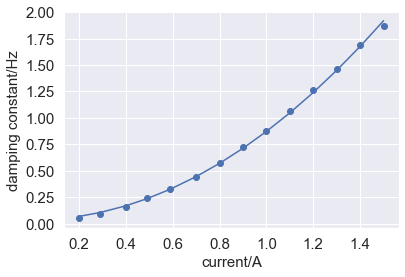

In [10]:
plt.scatter(I,lambda_list)
def func3(Strom,d,c):  
    return d*pow(Strom,2)+c
popt3, pcov3 = curve_fit(func3, I, lambda_list,maxfev=5000)

l=[func3(x,*popt3) for x in I]
xdata_liste=[]
#for i in range(26):
#    xdata_liste.append(xdate[i])
    
plt.plot(I, l)
plt.grid(b=True, which='major', axis='both')
format("current/A"  , "damping constant/Hz")
plt.savefig(fname='Ivslambda')

In [11]:
def parabola(x,a):
    return a*pow(x,2)

In [12]:
popt4, pcov4 = curve_fit(parabola, I, lambda_list,maxfev=5000)

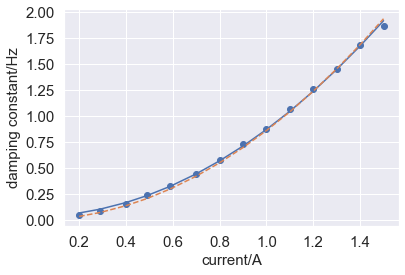

In [13]:
plt.scatter(I,lambda_list)
plt.plot(I, l)
y_para=[parabola(x,*popt4) for x in I]
plt.plot(I,y_para,ls='--')
plt.grid(b=True, which='major', axis='both')
format("current/A"  , "damping constant/Hz")
plt.savefig(fname='lambdavsI_parabola',bbox_inches='tight')

In [14]:
np.sqrt(np.diag(pcov3))

array([0.00758333, 0.00855482])

$\omega_d=\sqrt{\frac{k}{\Omega}-\lambda ^2}$

$\omega_0=\sqrt{\frac{k}{\Omega}}$

The plot below looks like it could be fitted to the $\omega_d$ function

In [15]:
def func2 (lamm,a):
    return np.sqrt(a-np.power(lamm,2))

In [16]:
initial_guess=[13]
popt2, pcov2 = curve_fit(func2, lambda_list, omega_list, initial_guess, maxfev=10000)
a=popt2[0]
a_Fehler=pcov2[0]

In [17]:
del lambda_list[0]
del omega_list[0]

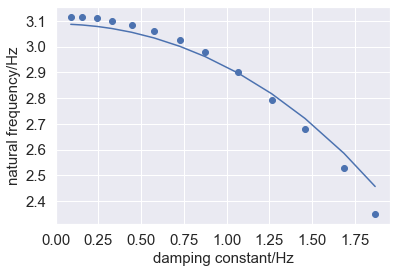

In [18]:
plt.scatter(lambda_list,omega_list)
plt.plot(lambda_list,func2(lambda_list,a))
plt.grid(b=True, which='major', axis='both')
format("damping constant/Hz"  , "natural frequency/Hz")
plt.savefig(fname='OmegavsLambda',bbox_inches='tight')

a alias k/Omega

In [19]:
a

9.532416454839867

Fehler von a alsias k/theta

In [20]:
#a_Fehler=pvov2[0]

In [21]:
print('The eigenfrequency is',np.sqrt(a),'mit fehler',np.sqrt(float(a_Fehler)))

The eigenfrequency is 3.08746116653147 mit fehler 0.06999231781436038
